In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gedi_old = pd.read_feather("/maps/forecol/data/Overlays/GEDI4A_JRC_filtering/dfs_all.feather")
gedi_new = pd.read_feather("/maps/forecol/data/Overlays/gedi_jrc_spark.feather")

In [5]:
gedi_either = pd.merge(gedi_old, gedi_new, on=["shot_number"], how="outer", indicator=True)
gedi_both = pd.merge(gedi_old, gedi_new, on=["shot_number"], how="inner", indicator=True)

In [6]:
print(len(gedi_old))
print(len(gedi_new))
print(len(gedi_either))
print(len(gedi_both))

2198495
2834907
5027526
5876


In [7]:
gedi_both.describe()

,shot_number,recovery_period_x,overlap_quality_x,lon_lowestmode_x,lat_lowestmode_x,agbd_x,agbd_pi_lower_x,agbd_pi_upper_x,agbd_se_x,l2_quality_flag_x,l4_quality_flag_x,degrade_flag_x,recovery_period_y,overlap_quality_y,lon_lowestmode_y,lat_lowestmode_y,agbd_y,agbd_pi_lower_y,agbd_pi_upper_y,agbd_se_y,l2_quality_flag_y,l4_quality_flag_y,degrade_flag_y
count,5.876000e+03,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000
mean,5.927185e+16,9.289823,0.915929,-58.919746,-6.822637,55.477164,-5731.173450,154.478838,12.739732,0.905548,0.751532,0.223281,9.311266,0.926481,-58.919741,-6.822540,118.823222,-4566.745345,248.140931,12.752512,0.916780,0.788632,14.163887
std,2.513455e+16,7.643787,1.373950,9.105830,5.145685,102.138691,4961.960932,156.690568,1.880393,0.292481,0.432162,0.416481,7.606198,1.395448,9.105821,5.145686,189.673624,5032.590790,272.970066,1.845856,0.276238,0.408314,27.995237
min,1.995010e+16,1.000000,0.000000,-79.289777,-17.889231,0.000000,-9999.000000,10.975060,2.981796,0.000000,0.000000,0.000000,1.000000,0.000000,-79.289808,-17.889286,0.000000,-9999.000000,10.975060,2.981796,0.000000,0.000000,0.000000
25%,3.620273e+16,4.000000,0.000000,-65.069514,-11.040271,2.289396,-9999.000000,53.820287,13.091639,1.000000,1.000000,0.000000,4.000000,0.000000,-65.069365,-11.040167,3.889513,-9999.000000,60.130632,13.089814,1.000000,1.000000,0.000000
50%,5.514050e+16,7.000000,0.000000,-57.108326,-6.733337,23.737556,-9999.000000,114.716148,13.099946,1.000000,1.000000,0.000000,7.000000,0.000000,-57.108279,-6.733249,42.192705,0.459676,149.986458,13.097966,1.000000,1.000000,0.000000
75%,8.474050e+16,12.000000,2.000000,-51.463244,-3.065919,68.219730,6.007452,198.936913,13.111538,1.000000,1.000000,0.000000,12.000000,1.000000,-51.463338,-3.065883,150.091167,40.998324,329.540344,13.110709,1.000000,1.000000,0.000000
max,9.770110e+16,36.000000,5.000000,-44.530678,8.569986,1676.423218,1219.059570,2206.487061,13.740086,1.000000,1.000000,1.000000,36.000000,5.000000,-44.530549,8.570090,2106.189697,1587.342041,2698.285156,13.740086,1.000000,1.000000,85.000000


<AxesSubplot:xlabel='agbd_x', ylabel='agbd_x'>

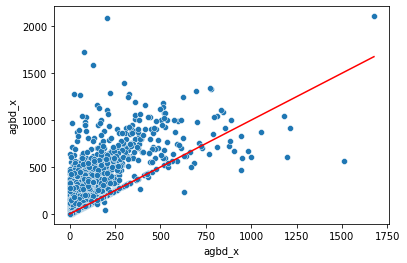

In [28]:
sns.lineplot(x=gedi_both.agbd_x, y = gedi_both.agbd_x, color='red')
sns.scatterplot(x=gedi_both.agbd_x, y=gedi_both.agbd_y)


<AxesSubplot:xlabel='agbd_pi_lower_x', ylabel='agbd_pi_lower_y'>

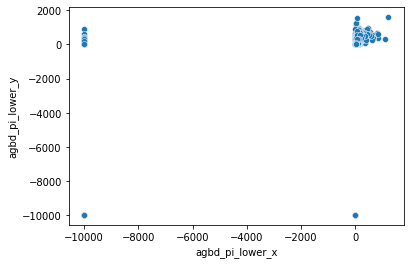

In [12]:
sns.scatterplot(x=gedi_both.agbd_pi_lower_x, y=gedi_both.agbd_pi_lower_y)

In [ ]:
def get_idx(axis: xa.DataArray, target: float):
    n = len(axis)
    min = axis.data.min()
    max = axis.data.max()
    return math.floor(n * (target - min) / (max - min))